# Lecture 18: Probabilistic Models

Applied Machine Learning 


Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Apr 1, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set  3 still open for submission.
2. Recitation will review Probabilistic Methods
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.



# Probabilistic Methods 

<table>
    <td width="40%"><center>
        <img src="./img/Lecture-18/ProbablisticLearning.png" /> 
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>

This chapter provides an overview of probalistic methods  in machine learning. 

The basic idea is that when the class probability distributions are known then wen constuct the `Bayes Optimal Classifier`.   However, in general, the class probability distributions are not known but are estimated from the data itself.   

</td></table> 
The use of probabilistic methods is applicable for both Supervised and Unsupervised Learning.

In this module we will cover Naive Bayes, which is one of the simplest and most general-purpose probabilistic models. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Probabilistic Modeling


In classification, if the probability distribution of the data belonging to the individual classes is known, then it is possible to obtain what is known as the   `Bayes optimal classifier`, which is the theoretically best possible classifier for any data set of labeled examples.

In practice, however, we do not know the true probability distributions, which leads to 2 related issues 

- Identifying the right class distributions
- Estimating the unknown parameters of this distribution from the data




# Preliminaries

In practise, we choose the probability distribution that seems appropriate for the data, and then estimate the parameters of the probability distribution using a standard parameter estimation approach for that distribution.

For example, for discrete distributions, we investigate the empirical probability mass function PMF, for continuous variables, we investigate the probability density function PDF. 

Scipy has a [large collection](https://docs.scipy.org/doc/scipy/reference/stats.html) of probability distributions.  Here are a few examples.

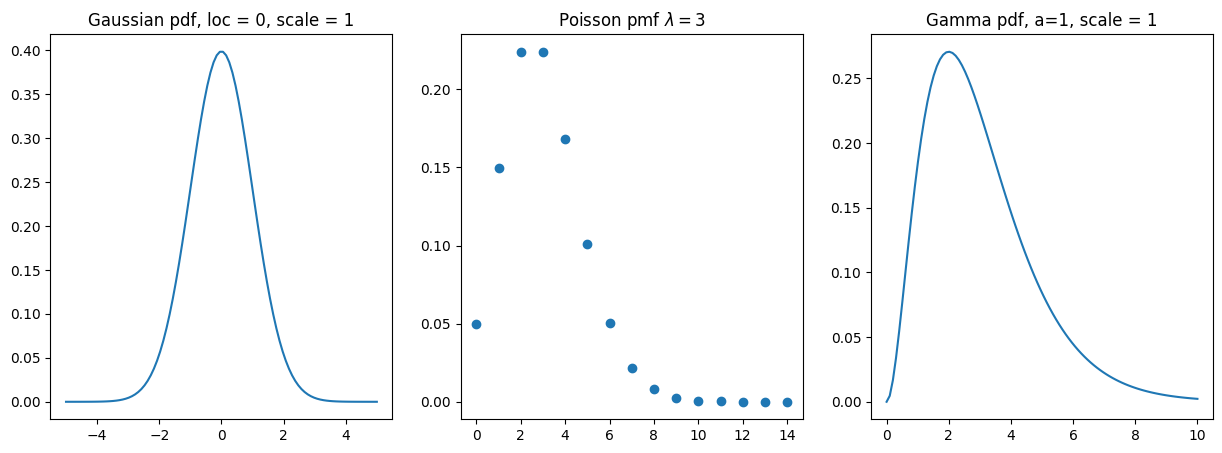

In [3]:
from scipy.stats import norm, poisson, gamma
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3,figsize=(15,5))

# gaussian pdf
x = np.linspace(-5, 5, 100)
axs[0].plot(x, norm.pdf(x, loc = 0, scale = 1))
axs[0].set_title("Gaussian pdf, loc = 0, scale = 1")

# poisson pmf
x = np.arange(0, 15, 1)
axs[1].scatter(x, poisson.pmf(x, 3))
axs[1].set_title("Poisson pmf $\lambda = 3$")


# gamma pdf
x = np.linspace(0, 10, 100)
axs[2].plot(x, gamma.pdf(x, a = 3, scale = 1))
axs[2].set_title("Gamma pdf, a=1, scale = 1")
plt.show()

### Bayes Rule


The famous **Bayes Rule** is just a simple statement of conditional and joint probability, which is often written as 


$$ P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

It's significance comees from the fact that it can be used to transform a prior probability $P(A)$ into a posterior probability $P(A|B)$, via is the conditional probability of $P(B|A)$. 

We first look at an example of Bayes rule and then try to understand how it can be applied to estimating distribution parameters.

### Example of Bayes Rule


Lets suppose that 10% of students do not sleep well and 5% of students do poorly in the course.  If we know that of the students who are not doing well, 33% are not sleeping well.

What is the probability of not doing well if you are not sleeping well.

B = students not sleeping well

A = students not doing well in the course

We want 

$$ P(A|B)=\frac{P(A)P(B|A)}{P(B)}=(.05*.33)/.1 = 16.5\%$$

### Bayes Optimal Classifier

The Bayes Optimal Classifier (BOC) $y^*(x)$ for a classification problem 
$X \longrightarrow Y$ where $x \in X$ represents the input features, and $y \in Y$ represents 
the target class, is given by 
$$ y^*(x) = \arg\max_{y} p(x|y) p(y) $$

In other words, the BOC is equivalent to the max 
posterior probability $p(y)$ of $y$.  

The BOC can be explicitly obtained if the prior probabilities $p(y)$ and the likelihood $p(x|y)$ are known.   

In practice, the BOC is approximated with the prior probabilities and likelihood function being estimated from the training data.  This estimation involves techniques such as Bayesian Learning, and Maximum Likelihood which are themselves applications of Bayes Rule.

## Bayesian Learning

If $\text{D}$ denotes the training data, and $\Theta$ denotes the set of parameters of the probability distribution, then from Bayes rule, we have 

$$ P(\Theta| \text{D})=\frac{P(\text{D}|\Theta)P(\Theta)}{P(\text{D})}$$

Each term in this equation has a specific interpretation. 

- $P(\Theta)$  - Prior Probability
- $P(\text{D}|\Theta)$ - Likelihood
- $P(\text{D})$ -  Marginal Probability
- $P(\Theta| \text{D})$ - Posterior Probability


This equation leads to several approaches to estimating the parameters $\Theta$, but the most widely used is the approach called `maximum likelihood`, which can be seen  to be equivalent to maximizing the posterior probability with uniform priors. 

$$ \Theta_{opt} = \arg\max_{\Theta} P(\text{D}|\Theta)$$


## Maximum Likelihood Estimation (MLE)

Given a probability distribution, the distribution  parameter estimates can be obtained using maximum likelihood. 


**Example- Binomial Distribution**

Lets say we flip a coin and get $N$ heads and $M$ tails.  Lets say the coin lands on heads with probability $\theta$.  

We want to find $\theta$ which maximizes the probability of getting the result we have seen.  We know that, under the independence assumption, the probability of getting $N$ heads and $M$ tails is given by 

$$P_\theta = \theta^N(1-\theta)^M$$

We want to maximize the probability, typically we work with the log-liklihood or log probability instead

*Why can I do this*?

The log is (Assume base $e$ for simplicity)
$$\log(P_\theta)=\log(\theta^N(1-\theta)^M)) = N\log(\theta) + M\log(1-\theta)$$

Since we want the maximum, we can take a derivative with respective to $\theta$

$$0=\frac{d}{d\theta}\log(P_\theta) = \frac{N}{\theta} - \frac{M}{1-\theta}$$

which we can solve for the maximum likelihood estimate $\hat{\theta}$ as  

$$\frac{N}{\hat{\theta}} = \frac{M}{1-\hat{\theta}} \implies\hat{\theta} = \frac{N}{N+M} $$

So in this case, the maximum likelihood $\hat{\theta}$ is just the fraction of heads, as expected!  

## Naive Bayes

For a binary classifier with output values $y = 0,1$, and a set of $N$ features, consider a approximation to the BOC where the required class distributions are obtained using MLE.     

We have for the conditional class probability 

$$p(y| x) = p(y | x_1, x_2, \dots, x_N)$$

Equivalently, from Bayes rule we can write

$$ p(y | x_1, x_2, \dots, x_N) \propto  p(x_1, x_2, \dots, x_N |y ) p(y) $$

If the RHS is known, this expression can be used to implement the Bayes Optimal Classifier. 


However, the high-dimensional multivariate probability distribution $ p(x_1, x_2, \dots, x_N |y )$ is unknown and difficult to estimate.  

A simplification is obtained using the *naive-Bayes assumption*  that the features $x_1, x_2, \dots, x_N$ are independent, when conditioned on the labels $y$.  That is,

$$ p(x_1, x_2, \dots, x_N|y)= \prod_i p(x_i|y),$$

so that

$$p(y | x)\propto\left[\prod_i p(x_i |y) \right]p(y)$$

For each feature $x_i$ and class $y$ we can now choose the appropriate univariate probability distribution and estimate the model parameters using maximum likelihood. 


Finally, for any new example $x_1, x_2, \dots, x_N$, similar to BOC, the class membership can be obtained as:

$$ \hat{y} = \arg\max_y \left[\prod_i p(x_i |y)\right] p(y)$$


# Text Classification Using Bag of Words

# Review: Text Classification

Text classification is important in many applications:

* spam filtering, fraud detection, medical record classification, news filtering, sentiment analysis
* Raw inputs are the word sequences in the documents.
* The transformation of raw text to features involves many details, but one approach is the bag of words (described below).
* The  dimensionality of the transformed feature set is very  large $O(M)$ where M is the size of the fixed vocabulary in the language domain.

# Bag of Words Feature Representation for Text

Given a vocabulary $V$ of size $|V|$, a bag of words representation of a raw text document $x$ is a function $\phi(x) \to \{0,1\}^d$ that outputs a feature vector
$$
\phi(x) = \left( 
\begin{array}{c}
1 \\
1 \\
1 \\
\vdots \\
0 \\
\vdots \\
\end{array}
\right)
\begin{array}{l}
\;\text{Able} \\
\;\text{was} \\
\;\text{I} \\
\\
\;\text{Melba} \\
\\
\end{array}
$$
of dimension $d = |V|$. The $j$-th component $\phi(x)_j$ equals $1$ if $x$ convains the $j$-th word in $V$ and $0$ otherwise.

The input feature has discrete components and is also high-dimensional.  If we assume that each feature component is bi-valued, then the probability distribution of the vector $\phi(x)$ takes support on a set of dimension $2^{|V|}$, which is clearly impractical to enumerate, let alone estimate accurately from a small set of training data examples.   

 

# Bernoulli Naive Bayes Assumption

In order to deal with high-dimensional $x$, we simplify the problem by making the *Naive Bayes* assumption:
$$ p(x|y) = \prod_{i=1}^d p(x_i \mid y) $$
In other words, the conditional class probability $p(x|y)$ factorizes over each features

* For example, if $x$ is a binary bag of words representation, then $p(x_j | y)$ is the probability of seeing the $j$-th word.

* We can model each $p(x_j | y)$ via a Bernoulli distribution, which has only one parameter. 

* Hence, it takes only $d$ parameters to specify the distribution under the Naive Bayes assumption  $p(x|y) = \prod_{j=1}^d p(x_j \mid y)$. (instead of $2^d-1$ for the full multi-dimensional distribution) to specify the entire distribution.


We can apply the Naive Bayes assumption to obtain a model for when $x$ is in a bag of words representation.

The *Bernoulli Naive Bayes* model $P_\theta(x,y)$ is defined as follows:
* The distribution over classes is [Categorical](https://en.wikipedia.org/wiki/Categorical_distribution), denoted $\text{Categorical}(\phi_1, \phi_2, ..., \phi_K)$. Thus, $P_\theta(y=k) = \phi_k$.
* The conditional probability of the data under class $k$ is given by $P_\theta(x|y=k) = \prod_{j=1}^d P(x_j \mid y=k)$, where each $P_\theta(x_j \mid y=k)$ is a $\text{Bernoullli}(\psi_{jk})$.

Formally, we have:
\begin{align*}
P_\theta(y) & = \text{Categorical}(\phi_1,\phi_2,\ldots,\phi_K) \\
\\
P_\theta(x_j=1|y=k) & = \text{Bernoullli}(\psi_{jk}) \\
P_\theta(x|y=k) & = \prod_{j=1}^d P_\theta(x_j|y=k)
\end{align*}

# Classification Dataset: Twenty Newsgroups

To illustrate the text classification problem, we will use a popular dataset called `20-newsgroups`. 
* It contains ~20,000 documents collected approximately evenly from 20 different online newsgroups.
* Each newgroup covers a different topic such as medicine, computer graphics, or religion.
* This dataset is widely used to benchmark text classification and other types of algorithms.


In [1]:
#https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html
    
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# for this lecture, we will restrict our attention to just 4 different newsgroups:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# print some information on it
print(twenty_train.DESCR[:1100])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

# Example: Text Classification

Let's see how this approach can be used in practice on the text classification dataset.
* We will learn a good set of parameters for a Bernoulli Naive Bayes model
* We will compare the outputs to the true predictions.

Let's see an example of this approach on `20-newsgroups`.

We start by computing these features using the `sklearn` library.

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(*fetch_20newsgroups(return_X_y=True))

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 

pipe = Pipeline([
    ('vectorize', CountVectorizer()),
    ('nb', MultinomialNB())
]).fit(X_train, y_train)

from sklearn.metrics import classification_report

print(classification_report(y_test, pipe.predict(X_test)))

bunch = fetch_20newsgroups()
bunch['target_names']

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       115
           1       0.78      0.82      0.80       168
           2       0.94      0.10      0.17       157
           3       0.64      0.79      0.71       151
           4       0.85      0.86      0.86       147
           5       0.65      0.93      0.76       145
           6       0.91      0.64      0.75       150
           7       0.90      0.85      0.88       148
           8       0.95      0.92      0.94       144
           9       0.98      0.88      0.92       160
          10       0.95      0.95      0.95       152
          11       0.71      0.98      0.82       133
          12       0.85      0.79      0.82       145
          13       0.93      0.94      0.93       157
          14       0.91      0.95      0.93       150
          15       0.74      0.97      0.84       146
          16       0.81      0.95      0.87       119
          17       0.84    

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Laplace Smoothing

What happens if we encounter a new feature $z$ at test time that we haven't seen before in the vocabulary for the training data?  

A similar issue arises for a new feature $z$ that is relatively infrequent in the training data.  It would seem to be overfitting to estimate its conditional probability from just a few examples. 


The solution is to add a smoothing term (sometimes called Laplace smoothing for $\alpha=1$) in the form

$$P(z|y = 1) = \frac{N_1 + \alpha}{N + \alpha K}$$


Here,
- $N_1$ number of examples with $z = 1, y=1$
- $\alpha$ represents the smoothing parameter,
- $K$ number of features,e.g. Vocabulary size
- $N$  number of examples with $y=1$



To understand this, lets plot for a few different alphas with $N_1, N, K$ fixed.

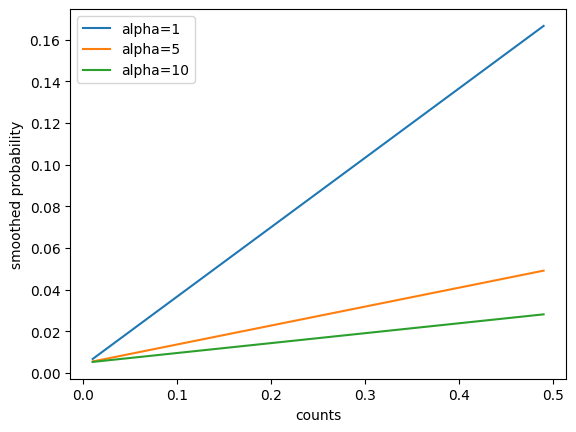

In [3]:
import matplotlib.pyplot as plt
counts, N, K = np.arange(1, 50, 4), 100, 200
for alpha in [1, 5, 10]:
    plt.plot(counts/N, (counts + alpha) /(N + K * alpha), 
             label=f'alpha={alpha}',
            )
plt.xlabel("counts")
plt.ylabel("smoothed probability")
plt.legend()
plt.show()

We see that as $\alpha$ gets larger, the probability is shrunk towards $1/K$ and it takes more examples with the  word counts present to influence the smoothed probability towards the maximum likelihood estimate.

# Summary

The Naive Bayes Model is a simple example of a probabilistic model that attempts to obtain the Bayes Optimal Classifier, and it is especially  effective in high-dimensional spaces. 
- Very simple model 
- Scalable (can be run out of core)
- Works pretty well in practice
- Works well with large feature spaces (large number of features compared to example size).  Often the case with word counts.

Cons:
- More complex deep learning models can perform much better